##**Problem Statement**

Mahindra is experimenting on making India’s next hydrogen Fuel Cell Electric Vehicle (FCEV). An FCEV is powered by a hydrogen fuel cell, which generates electric power using on-board hydrogen. On a full tank, this FCEV can go up to a claimed 600 kilometers.
They have reached out to Tech Mahindra for helping them in understanding some parameters related to Hydrogen Fuel cell sensors. As a data scientist working in the R&D team of Tech Mahindra, you need to analyze the aging process, charge, and discharge cycle of the cell and isolate some anomalies/ instances you see in the data.

## Data Dictionary:


Voltage_measured: Fuel Cell terminal voltage (Volts)
Current_measured: Fuel Cell output current (Amps)
Temperature_measured: Fuel Cell temperature (degree C)
Current_load: Current measured at load (Amps)
Voltage_load: Voltage measured at load (Volts)
Time: Time vector for the cycle (seconds)
Capacity: Fuel Cell capacity (Ahr) for discharge till 2.7V
Datetime: the date and time of the start of the cycle
Ambient_temperature: Temperature in which the fuel cell is stored (degree C)
Cycle: Charge cycle of the fuel cell

In [ ]:
#importing Libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from scipy.io import loadmat
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Function to convert the matlab files to csv:
def Load_data(nm,battery):
    mat = loadmat(nm)
    counter = 0
    dataset = []
    capacity_data = []

    for i in range(len(mat[battery][0, 0]['cycle'][0])):
        row = mat[battery][0, 0]['cycle'][0, i]
        if row['type'][0] == 'discharge' :
            ambient_temperature = row['ambient_temperature'][0][0]
            date_time = datetime.datetime(int(row['time'][0][0]),
                                   int(row['time'][0][1]),
                                   int(row['time'][0][2]),
                                   int(row['time'][0][3]),
                                   int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
            data = row['data']
            capacity = data[0][0]['Capacity'][0][0]
            for j in range(len(data[0][0]['Voltage_measured'][0])):
                voltage_measured = data[0][0]['Voltage_measured'][0][j]
                current_measured = data[0][0]['Current_measured'][0][j]
                temperature_measured = data[0][0]['Temperature_measured'][0][j]
                current_load = data[0][0]['Current_load'][0][j]
                voltage_load = data[0][0]['Voltage_load'][0][j]
                time = data[0][0]['Time'][0][j]
                dataset.append([counter + 1, ambient_temperature, date_time, capacity,
                                voltage_measured, current_measured,
                                temperature_measured, current_load,
                                voltage_load, time])
                capacity_data.append([counter + 1, ambient_temperature, date_time, capacity])
                counter = counter + 1
    return [pd.DataFrame(data=dataset,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity', 'voltage_measured',
                                'current_measured', 'temperature_measured',
                                'current_load', 'voltage_load', 'time']),
          pd.DataFrame(data=capacity_data,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity'])]

In [ ]:
B0005_dataset, B0005_capacity = Load_data('/content/B0005.mat','B0005')
B0005_dataset['flag'] = 1

In [ ]:
B0006_dataset, B0006_capacity = Load_data('/content/B0006.mat','B0006')
B0006_dataset['flag'] = 2

In [ ]:
B0007_dataset, B0007_capacity = Load_data('/content/B0007.mat','B0007')
B0007_dataset['flag'] = 3

In [ ]:
B0018_dataset, B0018_capacity = Load_data('/content/B0018.mat','B0018')
B0018_dataset['flag'] = 4

In [ ]:
fuel_cells_df = pd.concat([B0005_dataset,B0006_dataset,B0007_dataset,B0018_dataset], ignore_index = True)

In [ ]:
fuel_cells_df

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,flag
0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1
1,2,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1
2,3,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1
3,4,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1
4,5,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1
...,...,...,...,...,...,...,...,...,...,...,...
185716,34862,24,2008-08-20 08:37:19,1.341051,3.443760,-0.002426,35.383979,0.0006,0.000,2686.359,4
185717,34863,24,2008-08-20 08:37:19,1.341051,3.453271,-0.000981,35.179732,0.0006,0.000,2700.546,4
185718,34864,24,2008-08-20 08:37:19,1.341051,3.461963,0.000209,34.977000,0.0006,0.000,2714.640,4
185719,34865,24,2008-08-20 08:37:19,1.341051,3.469907,0.001516,34.785943,0.0006,0.000,2728.750,4


### Identification of variables and data types:

In [ ]:
fuel_cells_df.shape

(185721, 11)

In [ ]:
fuel_cells_df.columns

Index(['cycle', 'ambient_temperature', 'datetime', 'capacity',
       'voltage_measured', 'current_measured', 'temperature_measured',
       'current_load', 'voltage_load', 'time', 'flag'],
      dtype='object')

In [ ]:
fuel_cells_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185721 entries, 0 to 185720
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   cycle                 185721 non-null  int64         
 1   ambient_temperature   185721 non-null  uint8         
 2   datetime              185721 non-null  datetime64[ns]
 3   capacity              185721 non-null  float64       
 4   voltage_measured      185721 non-null  float64       
 5   current_measured      185721 non-null  float64       
 6   temperature_measured  185721 non-null  float64       
 7   current_load          185721 non-null  float64       
 8   voltage_load          185721 non-null  float64       
 9   time                  185721 non-null  float64       
 10  flag                  185721 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(2), uint8(1)
memory usage: 14.3 MB


In [ ]:
# Count of unique values
for i in fuel_cells_df.columns:
    print(i, ":" , fuel_cells_df[i].nunique())

cycle : 50285
ambient_temperature : 1
datetime : 300
capacity : 636
voltage_measured : 185721
current_measured : 185721
temperature_measured : 185721
current_load : 21
voltage_load : 1835
time : 62016
flag : 4


In [ ]:
#dropping 'ambient_temperature' column from the data frame
fuel_cells_df.drop('ambient_temperature', axis = 1, inplace = True)

In [ ]:
fuel_cells_df

,cycle,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,flag
0,1,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1
1,2,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1
2,3,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1
3,4,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1
4,5,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1
...,...,...,...,...,...,...,...,...,...,...
185716,34862,2008-08-20 08:37:19,1.341051,3.443760,-0.002426,35.383979,0.0006,0.000,2686.359,4
185717,34863,2008-08-20 08:37:19,1.341051,3.453271,-0.000981,35.179732,0.0006,0.000,2700.546,4
185718,34864,2008-08-20 08:37:19,1.341051,3.461963,0.000209,34.977000,0.0006,0.000,2714.640,4
185719,34865,2008-08-20 08:37:19,1.341051,3.469907,0.001516,34.785943,0.0006,0.000,2728.750,4


In [ ]:
fuel_cells_df.describe(include=[np.number]).transpose()

,count,mean,std,min,25%,50%,75%,max
cycle,185721.0,23695.670797,14115.216705,1.000000,11608.000000,23216.000000,34823.000000,50285.000000
capacity,185721.0,1.574863,0.190633,1.153818,1.426025,1.559634,1.741850,2.035338
voltage_measured,185721.0,3.497219,0.251691,1.737030,3.377653,3.500859,3.655751,4.233325
current_measured,185721.0,-1.832569,0.561405,-2.029098,-2.011418,-2.009015,-1.989974,0.014306
temperature_measured,185721.0,32.378997,4.027737,22.350256,29.570621,32.355737,35.420677,42.332522
current_load,185721.0,1.465434,1.226874,-2.000000,1.998200,1.998800,1.999000,2.000000
voltage_load,185721.0,2.366494,0.751377,0.000000,2.410000,2.558000,2.718000,4.249000
time,185721.0,1546.379935,906.958628,0.000000,764.797000,1537.031000,2307.485000,3690.234000
flag,185721.0,2.375466,1.073068,1.000000,1.000000,2.000000,3.000000,4.000000


In [ ]:
def missingValue(df):
    total_null = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/len(df))*100).sort_values(ascending = False)
    print(f"Total records in our data =  {df.shape[0]} where missing values are as follows:")

    missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
    return missing_data
missing_df = missingValue(fuel_cells_df)
missing_df[missing_df['Total Missing'] > 0]

Total records in our data =  185721 where missing values are as follows:


,Total Missing,In Percent


# Univariate Analysis:

In [ ]:
def numerical_feat(df,colname,nrows=2,mcols=2,width=15,height=70):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    fig.set_facecolor("lightgrey")
    rows = 0
    for var in colname:
        ax[rows][0].set_title(" Outlier Detection using Boxplot ", fontweight="bold")
        plt.ylabel(var, fontsize=12)
        sns.boxplot(y = df[var],color='c',ax=ax[rows][0])

        sns.histplot(df[var],color='purple',ax=ax[rows][1],kde=True)
        ax[rows][1].axvline(df[var].mean(), color='c', linestyle='--', label="Mean")
        ax[rows][1].axvline(df[var].median(), color='m', linestyle='-', label="Median")
        ax[rows][1].axvline(df[var].mode()[0], color='royalblue', linestyle='-', label="Mode")
        ax[rows][1].set_title("Outlier Detection ", fontweight="bold")
        ax[rows][1].legend({'Mean':df[var].mean(),'Median':df[var].median(),'Mode':df[var].mode()})
        rows += 1
    plt.show()

In [ ]:
fuel_cells_df.columns

Index(['cycle', 'datetime', 'capacity', 'voltage_measured', 'current_measured',
       'temperature_measured', 'current_load', 'voltage_load', 'time', 'flag'],
      dtype='object')

In [ ]:
numerical_cols = ['capacity', 'voltage_load']

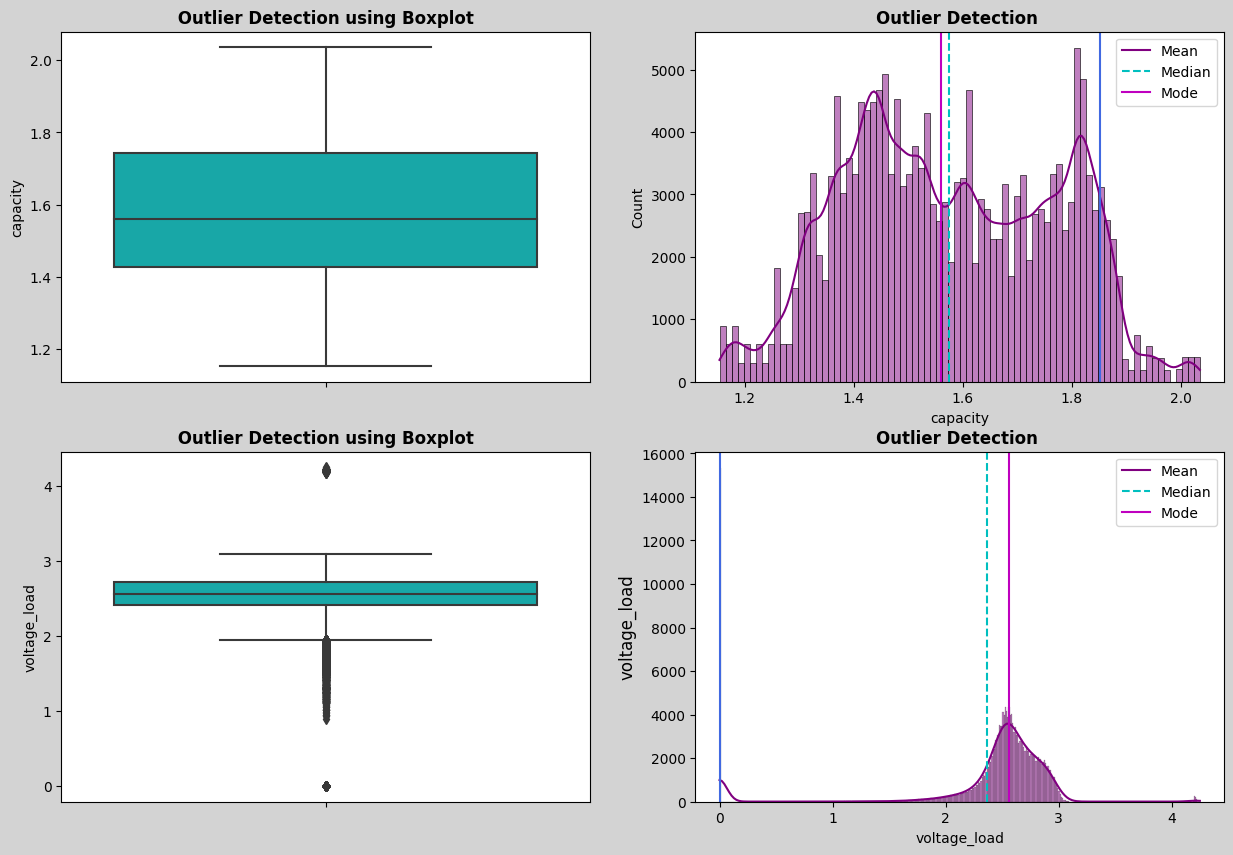

In [ ]:
numerical_feat(fuel_cells_df,numerical_cols,len(numerical_cols),2,15,10)

- As we can see,capacity is multimodal having nearly zero outliers.
- Whereas,the voltage load gas near normal distribution and has few outliers to the lower end.

In [ ]:
categorical_cols = ['flag']

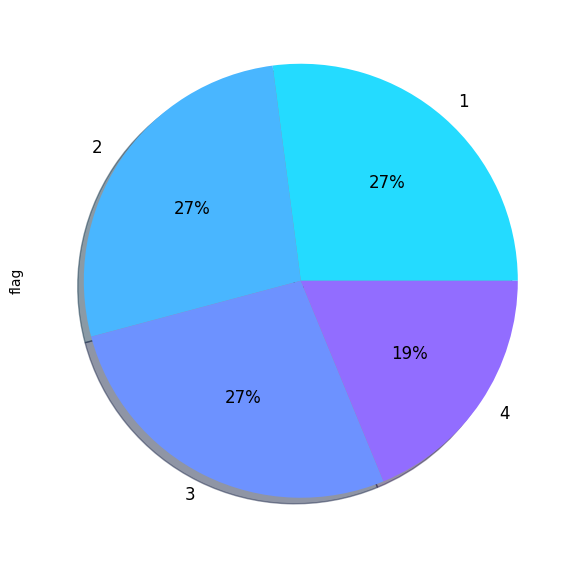

In [ ]:
plt.figure(figsize = (7,8))
count = (fuel_cells_df['flag'].value_counts(normalize=True)*100)
count.plot.pie(colors = sns.color_palette("cool"),autopct='%0.0f%%',
                       textprops={'fontsize': 12},shadow = True)
plt.show()

- Battery 4 has least number of datapoints, whereas the other three have equal no. of dp.

# Bivariate Analysis:

In [ ]:
fuel_cells_df.columns

Index(['cycle', 'datetime', 'capacity', 'voltage_measured', 'current_measured',
       'temperature_measured', 'current_load', 'voltage_load', 'time', 'flag'],
      dtype='object')

### 1. Capacity vs Cycle

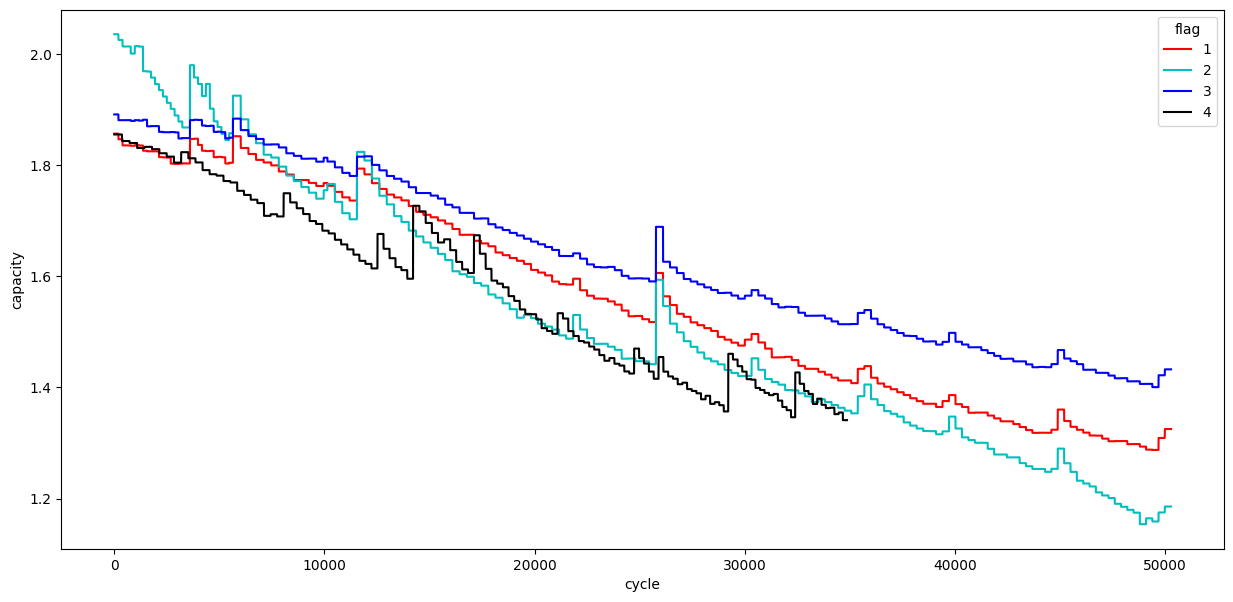

In [ ]:
plt.figure(figsize=(15, 7))
sns.lineplot(x = 'cycle', y = 'capacity', data = fuel_cells_df, palette = ['r','c','b','k'], hue = 'flag')
plt.show()


- As the cycle increases, the batterry capacities is showing a decreasing trend for all of the batteries.
- Capacity of batteries decrease as no. of cycles of battery usage increases
- Battery B0006 is having the largest capacity when it's new. Whereas B0018 and B0007 is having the least capacity when it's unused.
- Over a period of time, B0006 shows much more deteriorating trend than others , whereas B0007 has the most efficient capacity.

### 2.Datetime vs capacity

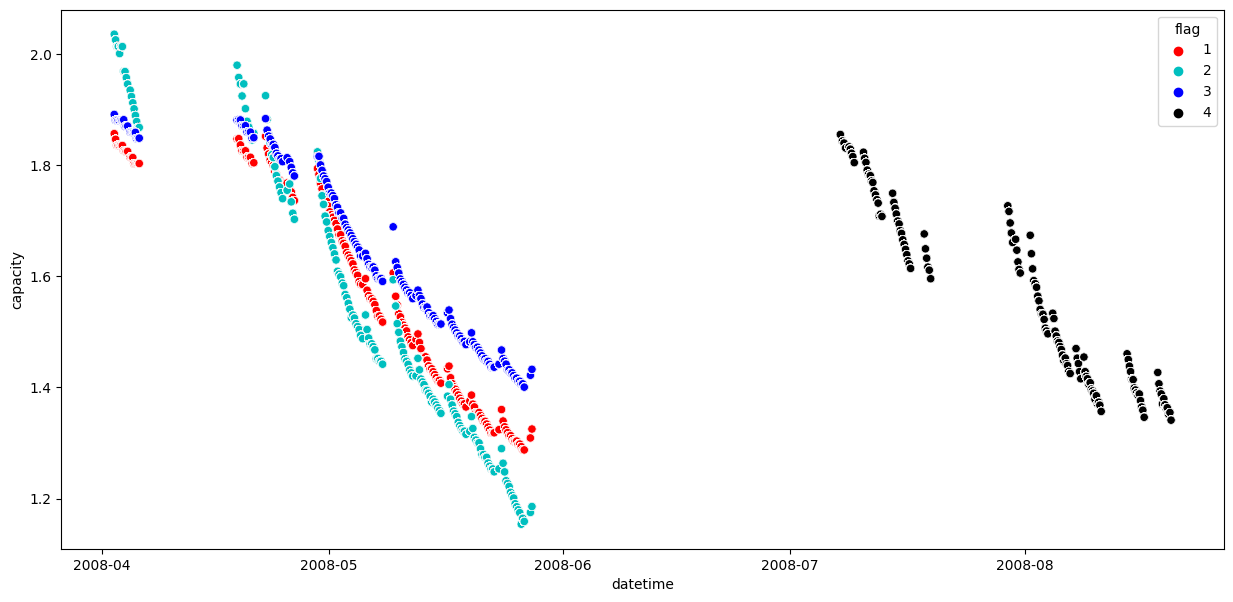

In [ ]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x = 'datetime', y = 'capacity', data = fuel_cells_df, palette = ['r','c','b','k'], hue = 'flag')
plt.show()

- Capacity decreases over a period of time.
-  We can clearly see that, Battery (B0018) has been launched recently and is having average capacity over time.
- Capacity of Battery B0002 deteriorates the most over time whereas for blue it's most efficient in terms of capacity over a period of time.

### 3. Capacity vs time

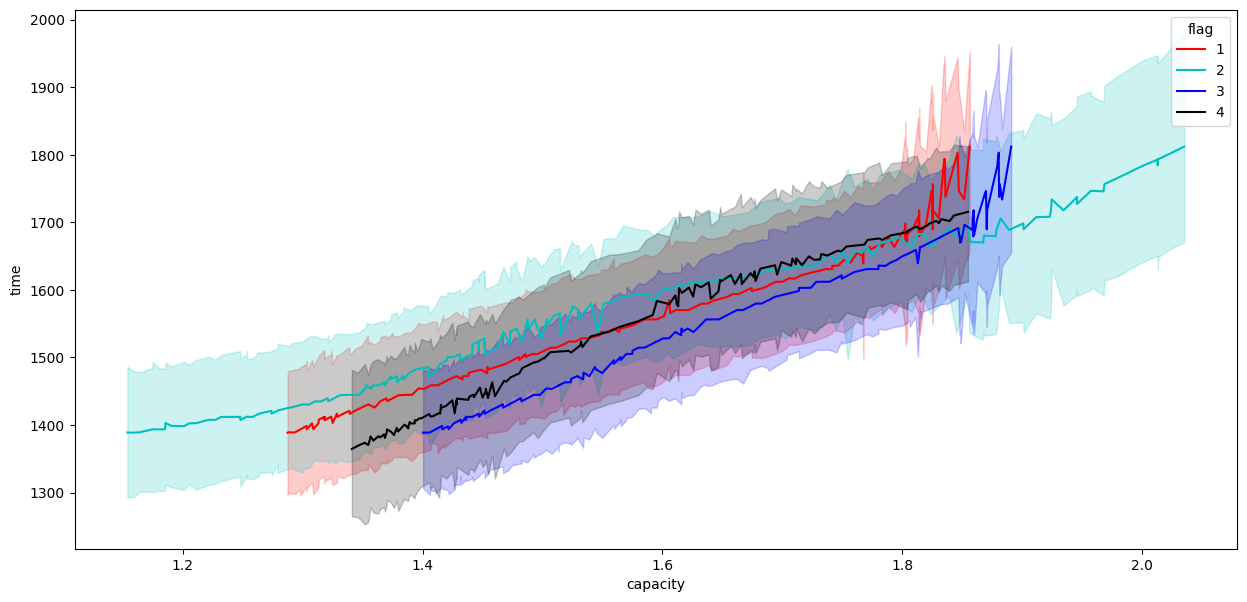

In [ ]:
plt.figure(figsize=(15, 7))
sns.lineplot(x = 'capacity', y = 'time', data = fuel_cells_df, palette = ['r','c','b','k'], hue = 'flag')
plt.show()

- As time to charge the batteries is increasing, the capacity is also increasing on an average for all four batteries

### 4. Temperature Vs time

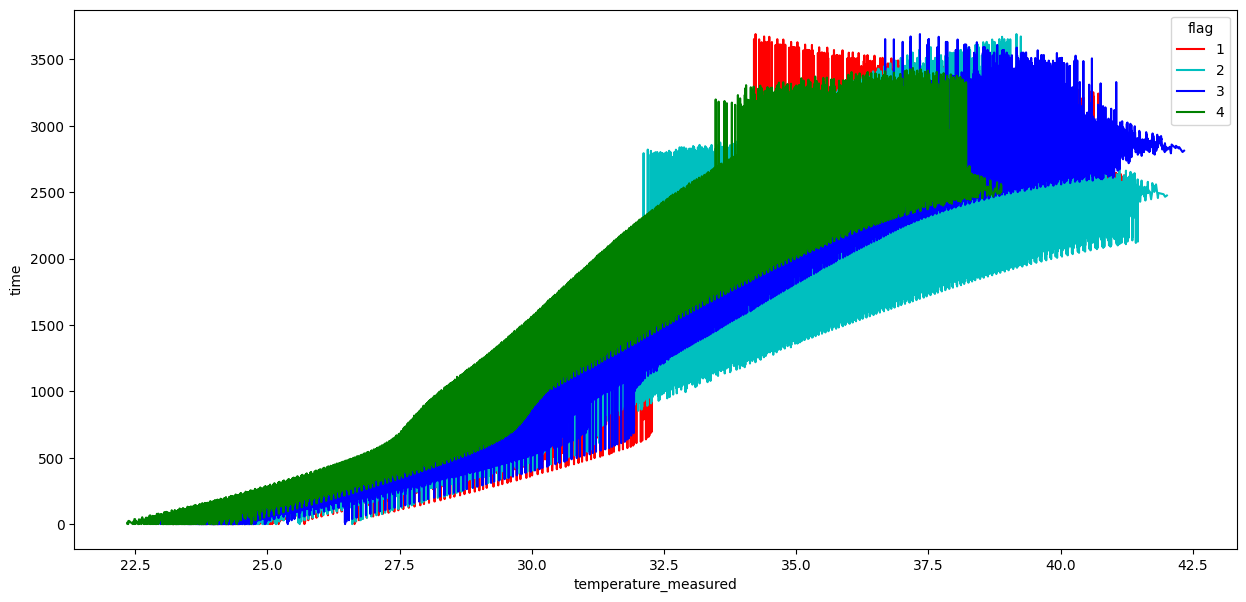

In [ ]:
plt.figure(figsize=(15, 7))
sns.lineplot(x = 'temperature_measured', y = 'time', data = fuel_cells_df, palette = ['r','c','b','g'], hue = 'flag')
plt.show()

-  As time increases for batteries, the depreciation increases because, temeperature_measured increases in every cycle of charging.
- As clearly visible, Batter (B0006) with flag 2 has max no. of outliers

### 5. Voltage measured w.r.t time

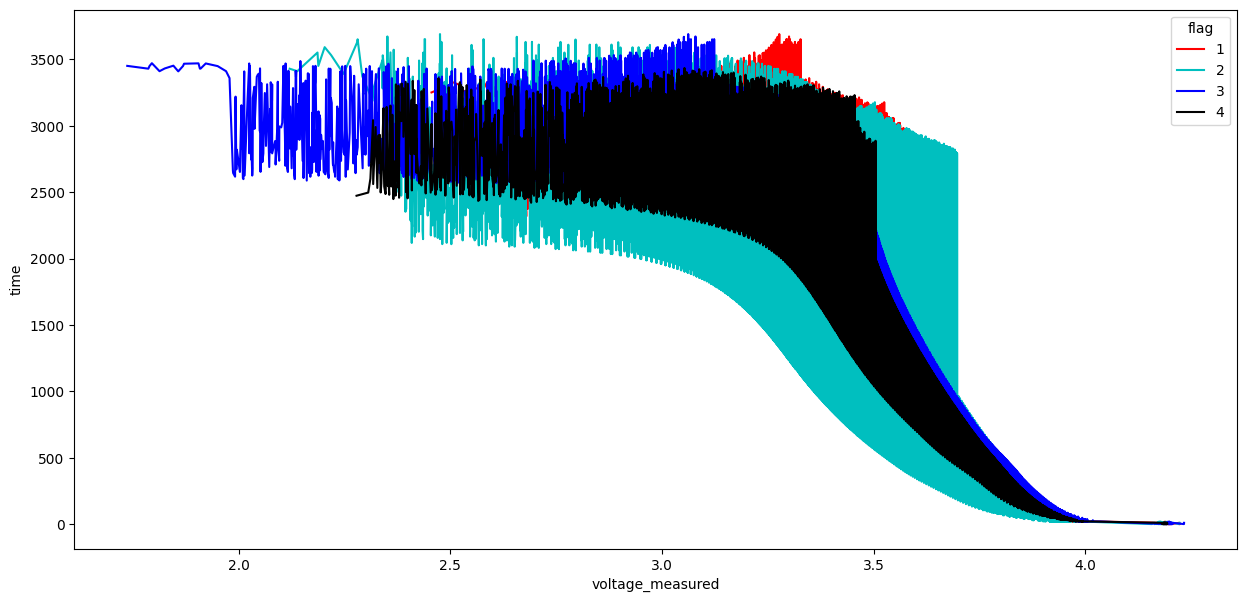

In [ ]:
plt.figure(figsize=(15, 7))
sns.lineplot(x = 'voltage_measured', y = 'time', data = fuel_cells_df, palette = ['r','c','b','k'], hue = 'flag')
plt.show()

- As clearly visible, Batter (B0006) with flag 2 has max no. of outliers

### 7. Current measured w.r.t time

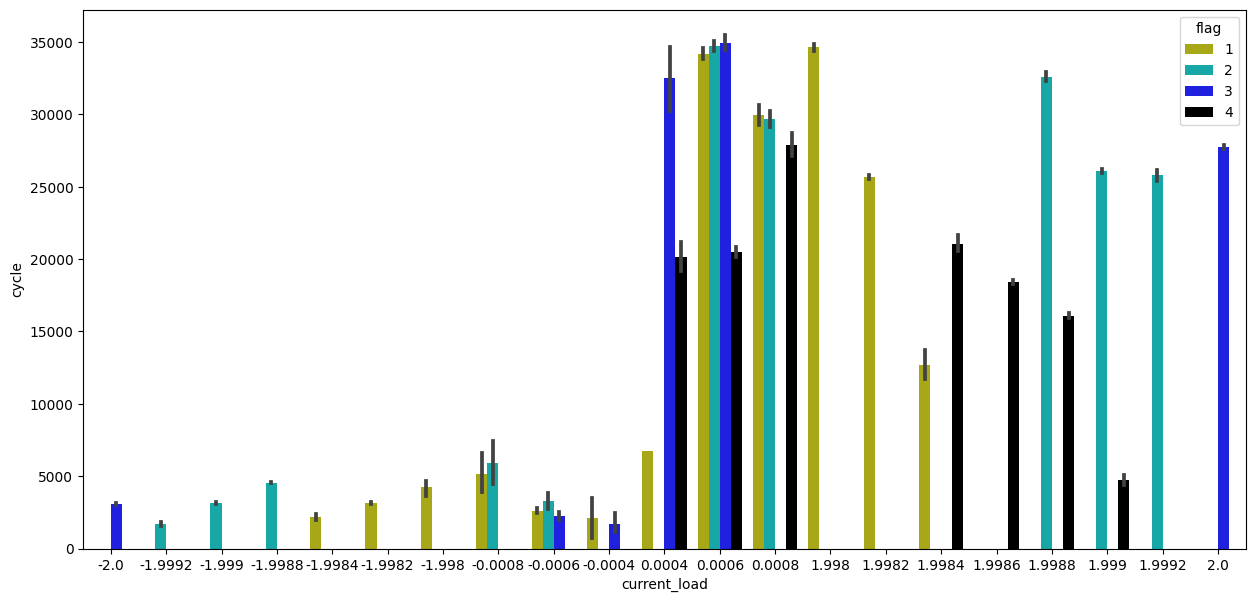

In [ ]:
plt.figure(figsize=(15, 7))
sns.barplot(x = 'current_load', y = 'cycle', data = fuel_cells_df, palette = ['y','c','b','k'], hue = 'flag')
plt.show()

- As clearly visible, Batter (B0006) with flag 2 has max no. of outliers

### 8. Correlation between various features

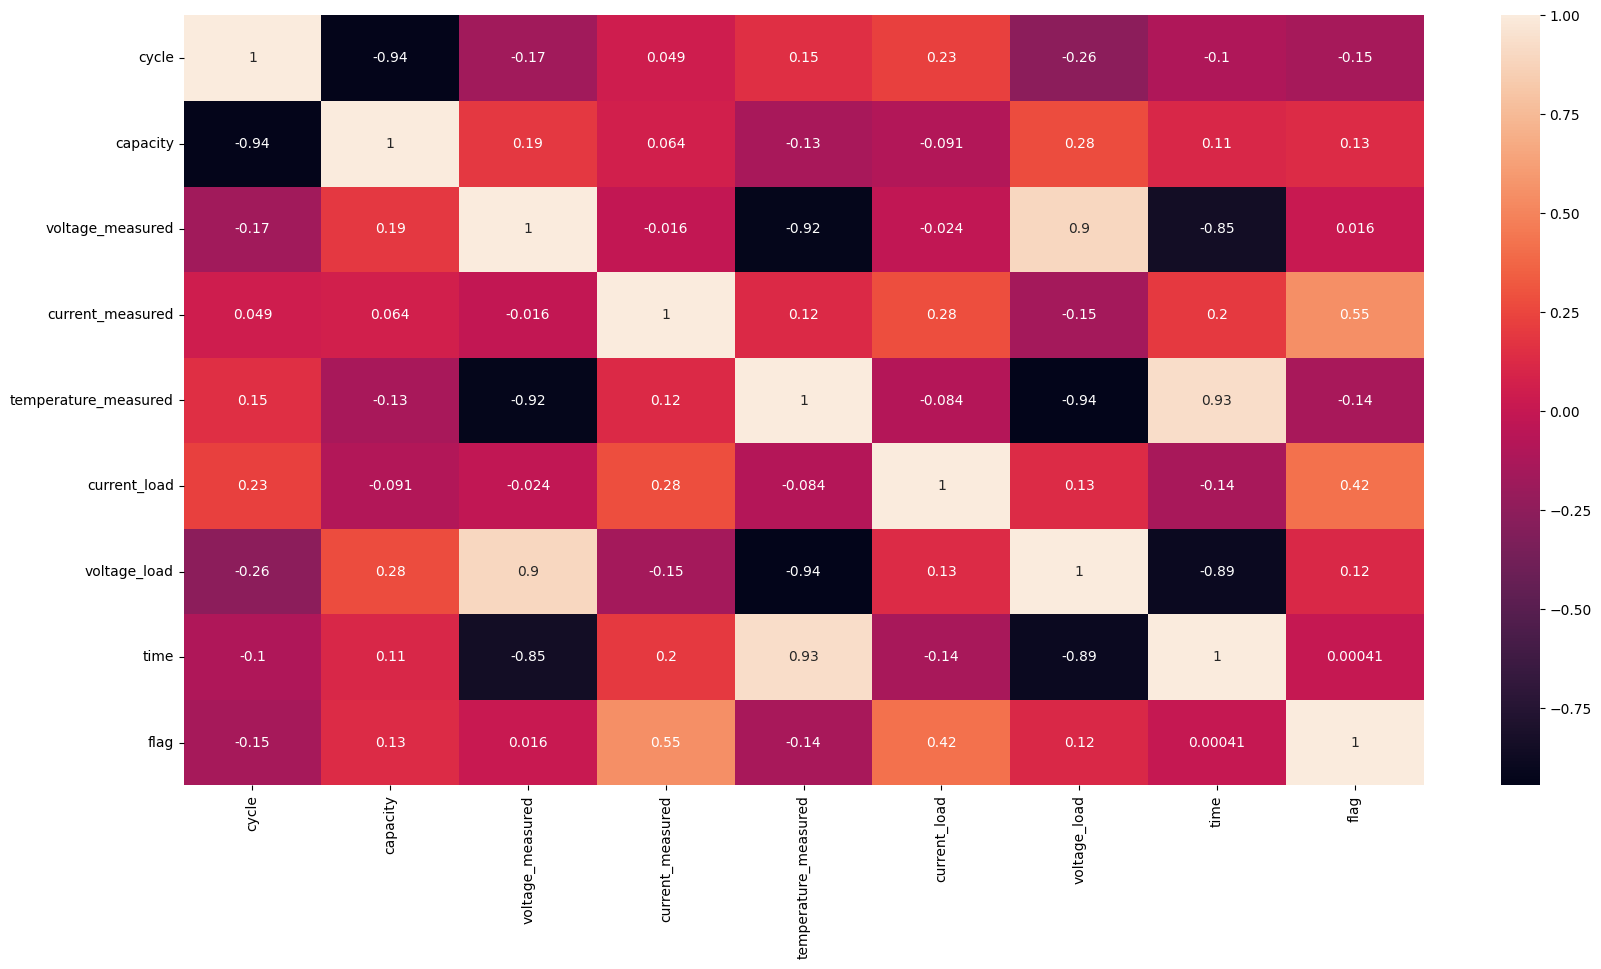

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.heatmap(fuel_cells_df.corr(method = 'spearman'), annot = True)
plt.show()

- cycle & capacity -> - correlated.
- temperature and time -> + correlated.
- volatage load and voltage_measured -> - correlated.
- voltage_measured and time -> + correlated.

In [ ]:
fuel_cells_df.drop_duplicates(keep = 'first', inplace = True)
fuel_cells_df.shape

(185721, 10)

In [ ]:
fuel_cells_df.dropna(inplace = True)

In [ ]:
fuel_cells_df.shape

(185721, 10)

In [ ]:
fuel_cells_df.columns

Index(['cycle', 'datetime', 'capacity', 'voltage_measured', 'current_measured',
       'temperature_measured', 'current_load', 'voltage_load', 'time', 'flag'],
      dtype='object')

#( IQR and DBSCAN )

# 1. IQR based anomaly detection

In [ ]:
num_cols_1 = ['capacity', 'voltage_measured','voltage_load']

In [ ]:
num_cols_2 = ['current_measured','current_load']
temp = ['temperature_measured']

In [ ]:
num_cols_3 = ['cycle','time']

In [ ]:
Q1 = fuel_cells_df.quantile(0.25)
Q3 = fuel_cells_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

cycle                   23215.000000
capacity                    0.315825
voltage_measured            0.278098
current_measured            0.021444
temperature_measured        5.850056
current_load                0.000800
voltage_load                0.308000
time                     1542.688000
flag                        2.000000
dtype: float64


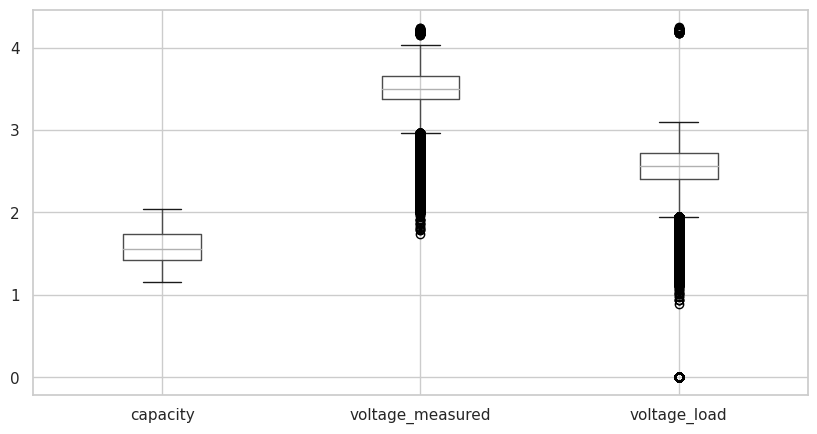

In [ ]:
sns.set(style="whitegrid")
fuel_cells_df[num_cols_1].boxplot(figsize = (10,5))
plt.show()

#### - 'voltage_measured','voltage_load'  features have more no. of outliers (below the lower whisker)

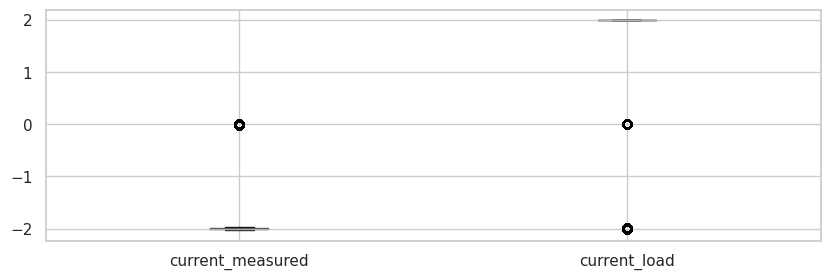

In [ ]:
fuel_cells_df[num_cols_2].boxplot( figsize = (10,3))
plt.show()

#### - As the dataponts are less, the IQR range is very small, but some outliers are present for 'current_measured','current_load'

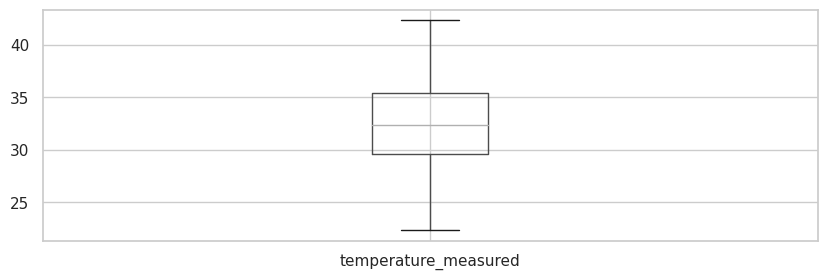

In [ ]:
fuel_cells_df[temp].boxplot(figsize = (10,3))
plt.show()

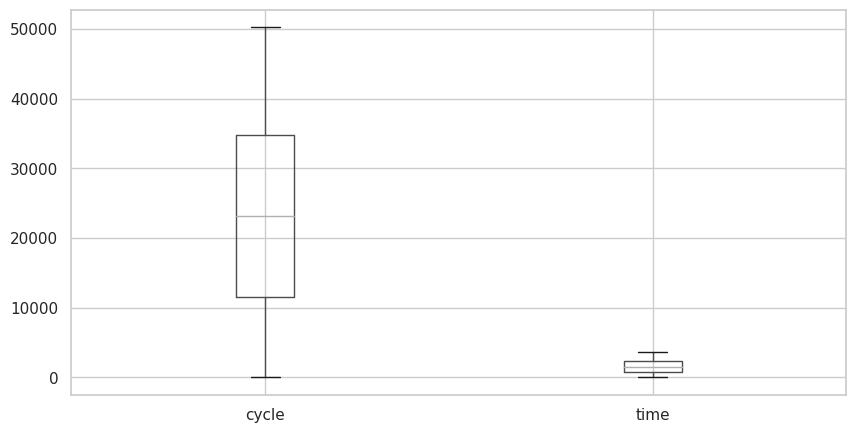

In [ ]:
fuel_cells_df[num_cols_3].boxplot(figsize = (10,5))
plt.show()

- All other features are having very less outliers

In [ ]:
num_cols = ['cycle','capacity', 'voltage_measured', 'current_measured',
       'temperature_measured', 'current_load', 'voltage_load', 'time']

In [ ]:
fuel_cells_df.shape

(185721, 10)

In [ ]:
fuel_cells_df1 = fuel_cells_df.copy()

### Outliers treatment using IQR based method

In [ ]:
fuel_cells_df1 = fuel_cells_df1[~((fuel_cells_df1[num_cols] < (Q1 - 1.5*IQR)) | (fuel_cells_df1[num_cols] > (Q3 +1.5*IQR))).any(axis = 1)]
fuel_cells_df1 = fuel_cells_df1.reset_index(drop = True)

In [ ]:
fuel_cells_df1.shape

(147955, 10)

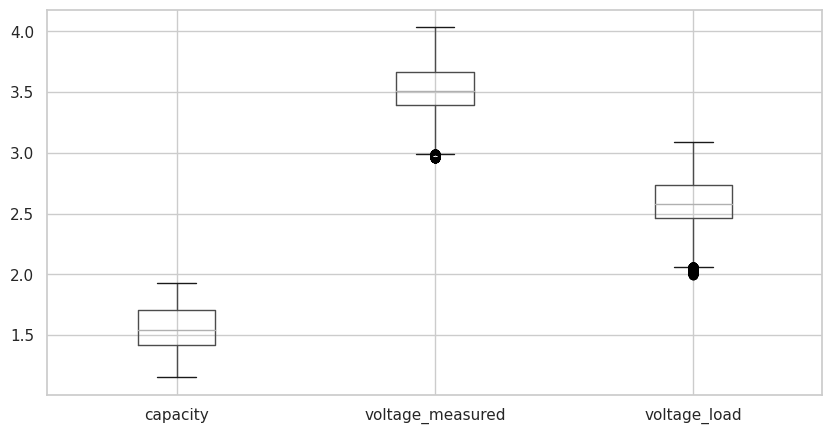

In [ ]:
fuel_cells_df1[num_cols_1].boxplot(figsize = (10,5))
plt.show()

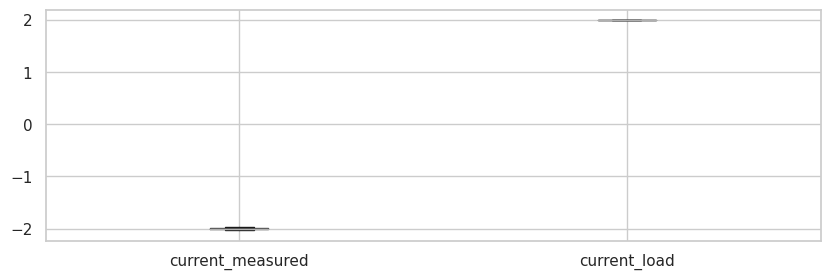

In [ ]:
fuel_cells_df1[num_cols_2].boxplot(figsize = (10,3))
plt.show()

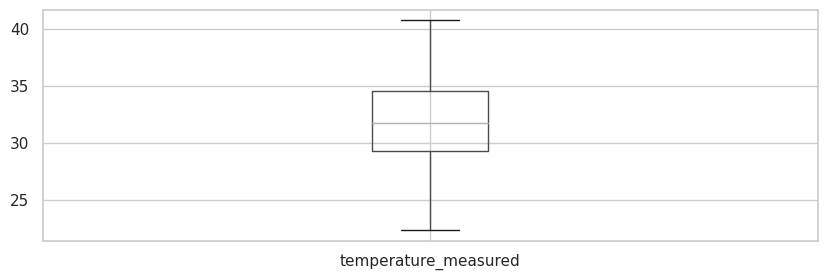

In [ ]:
fuel_cells_df1[temp].boxplot(figsize = (10,3))
plt.show()

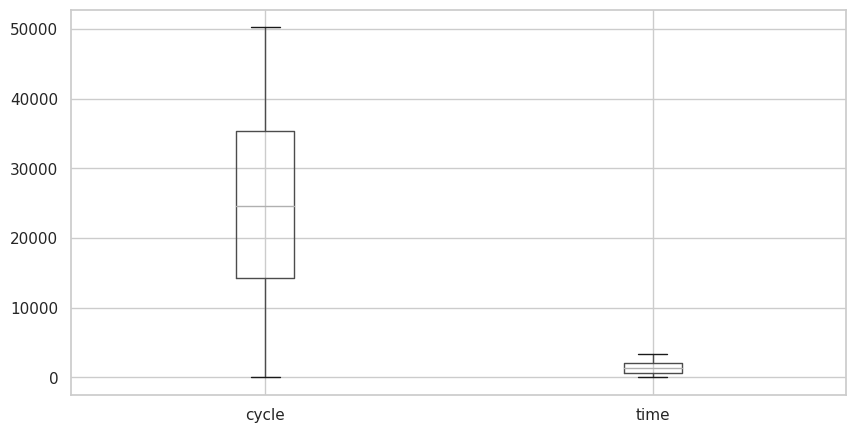

In [ ]:
fuel_cells_df1[num_cols_3].boxplot(figsize = (10,5))
plt.show()

In [ ]:
fuel_cells_df1.shape[0] - fuel_cells_df.shape[0]

-37766

- As we can see, total 37,766 datapoints are eliminated using IQR based method.
- This might contain some useful data as well, so it's better to treat/ detect outliers with some robust and SOTA methods of anomaly detection

In [ ]:
fuel_cells_df_copy1 = fuel_cells_df.copy()

In [ ]:
fuel_cells_df['datetime'] = fuel_cells_df['datetime'].astype('int64')
fuel_cells_df['datetime'].head()
fuel_cells_df_copy2 = fuel_cells_df.copy()

# 2. DBSCAN based anomaly detection

 -  As we know from above IQR method, that we have approx 37k outliers from 1.85 lac dataponts, I have carefully tried the hyperparameters (eps and minpts)
 - I have tried with several values of eps and minpts, and got to a conclusion that,with minpts  = 200 and eps = 0.5 we are getting the best results ( compared the results with sampling (taking 10k datapoints (later)) and bootstrapping with replacement )

In [ ]:
# DBSCAN

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

cols = ['cycle', 'datetime', 'capacity', 'voltage_measured', 'current_measured',
       'temperature_measured', 'current_load', 'voltage_load', 'time', 'flag']



std_scaler = StandardScaler().fit(fuel_cells_df_copy2)
std_df = std_scaler.transform(fuel_cells_df_copy2)

dbsc = DBSCAN(eps = .5, min_samples = 200).fit(std_df)


labels = dbsc.labels_




In [ ]:
out_df = fuel_cells_df_copy2.copy()
out_df['label'] = dbsc.labels_

In [ ]:
out_df['label'].value_counts()

 7     41652
 1     39197
 4     37765
 9     31177
-1      8009
 6      5394
 3      5292
 0      5209
 5      4825
 2      4202
 10     1991
 8      1008
Name: label, dtype: int64

In [ ]:
count_df = pd.DataFrame(data = out_df['label'].value_counts().values, columns = ['label_counts'])
count_df

,label_counts
0,41652
1,39197
2,37765
3,31177
4,8009
5,5394
6,5292
7,5209
8,4825
9,4202


In [ ]:
index_df = pd.DataFrame(data = out_df['label'].value_counts().index, columns = ['label_index'])
index_df

,label_index
0,7
1,1
2,4
3,9
4,-1
5,6
6,3
7,0
8,5
9,2


In [ ]:
label_counts_df = pd.concat([index_df,count_df], axis = 1)
label_counts_df

,label_index,label_counts
0,7,41652
1,1,39197
2,4,37765
3,9,31177
4,-1,8009
5,6,5394
6,3,5292
7,0,5209
8,5,4825
9,2,4202


In [ ]:
out_df

,cycle,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,flag,label
0,1,1207149941000000000,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1,-1
1,2,1207149941000000000,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1,-1
2,3,1207149941000000000,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1,0
3,4,1207149941000000000,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1,0
4,5,1207149941000000000,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1,0
...,...,...,...,...,...,...,...,...,...,...,...
185716,34862,1219221439000000000,1.341051,3.443760,-0.002426,35.383979,0.0006,0.000,2686.359,4,10
185717,34863,1219221439000000000,1.341051,3.453271,-0.000981,35.179732,0.0006,0.000,2700.546,4,10
185718,34864,1219221439000000000,1.341051,3.461963,0.000209,34.977000,0.0006,0.000,2714.640,4,10
185719,34865,1219221439000000000,1.341051,3.469907,0.001516,34.785943,0.0006,0.000,2728.750,4,10


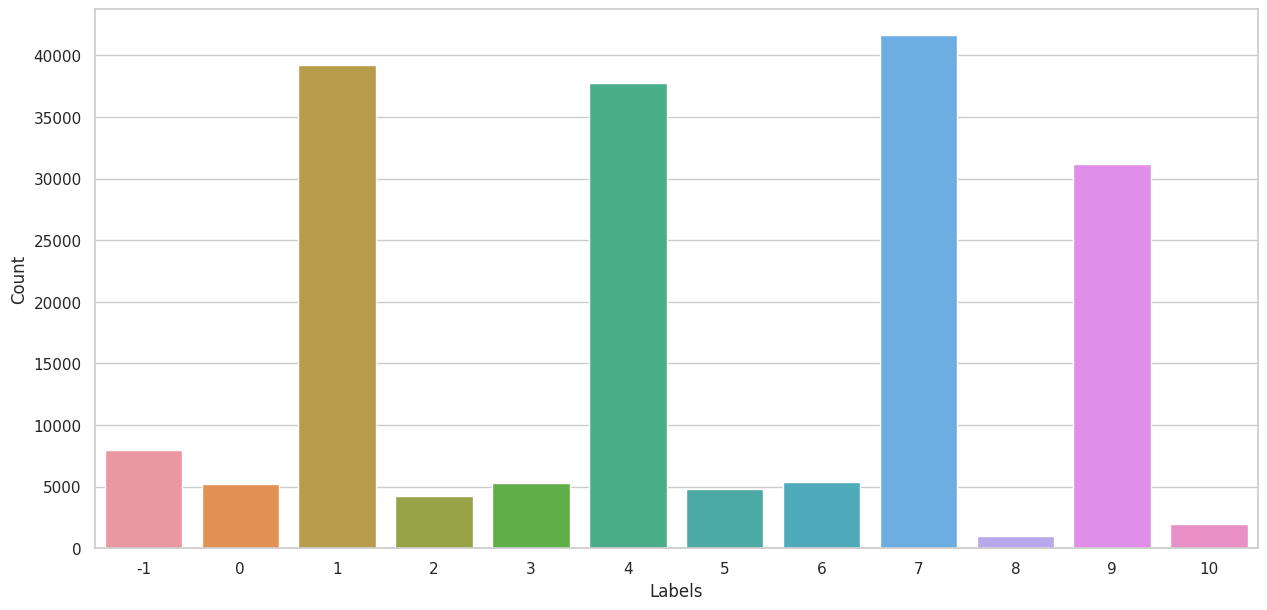

In [ ]:
plt.figure(figsize=(15, 7))
sns.barplot(x =  'label_index', y = 'label_counts', data = label_counts_df)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

-  As we can see, when all features are considered, the datapoints corresponding to -1 (noisy data)  are 8009
- lets' further check with visualization and DBSCAN on other two features.
- It's running with very high time complexity and hence we have visualised on 10k samples.

### Visualization in lower dimention ( 2 features)

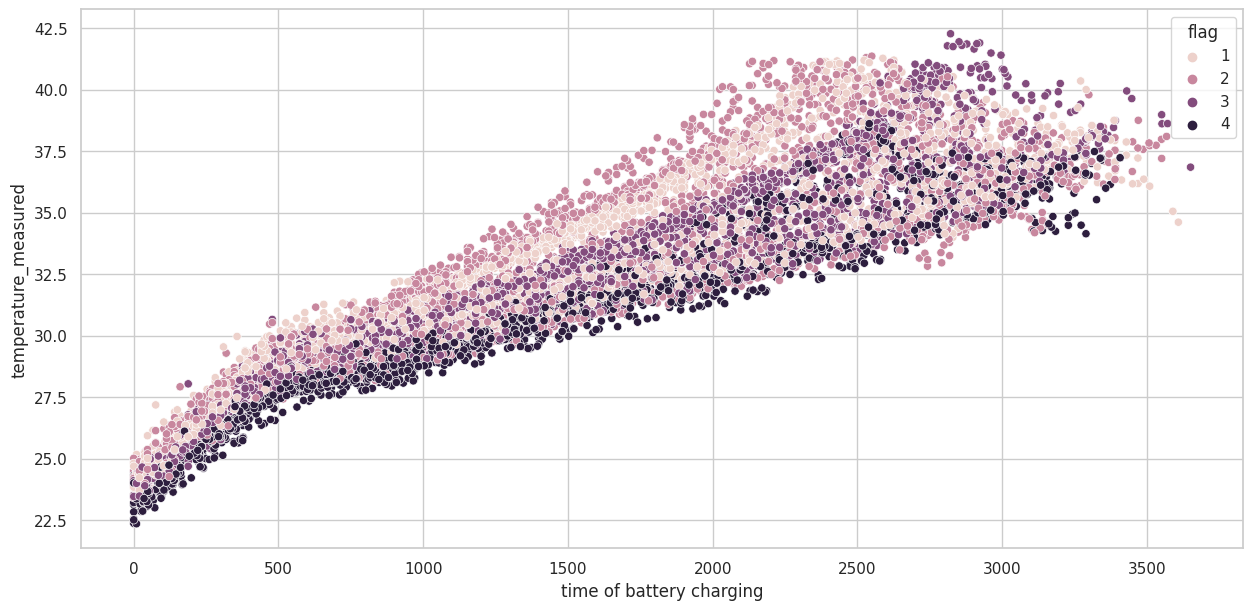

In [ ]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x = 'time', y = 'temperature_measured', hue ='flag', data = out_df.sample(n = 10000, replace = True))
plt.xlabel('time of battery charging')
plt.ylabel('temperature_measured')
plt.show()

-  We can hardly see any outliers present when visualized with these two features.
- Lets cross check with some other two features

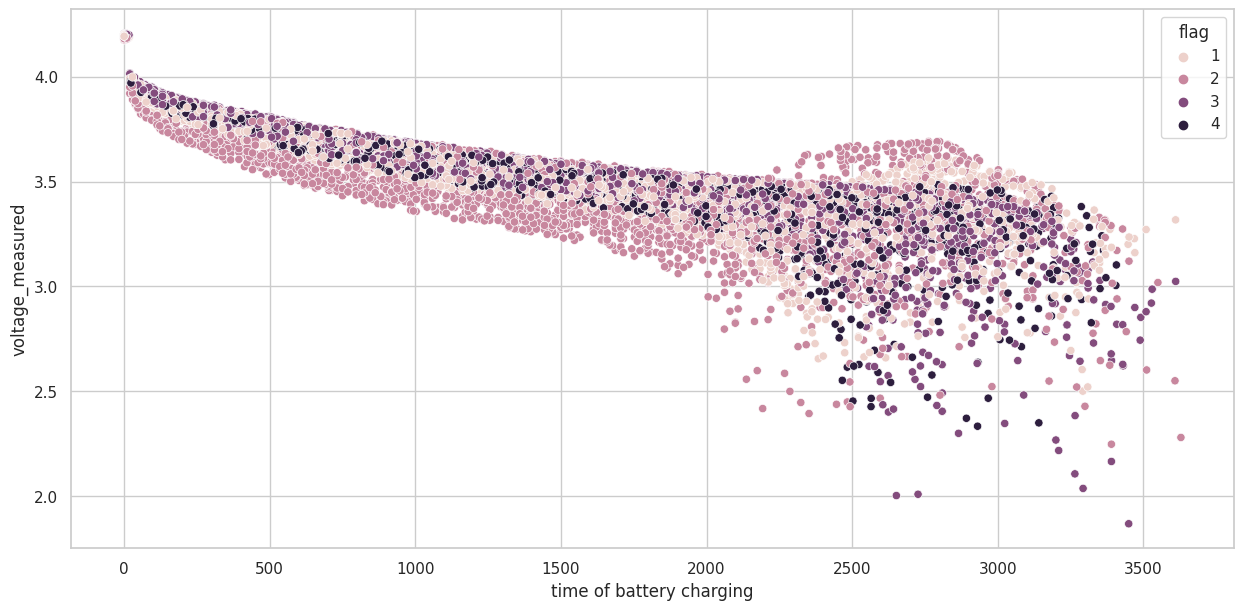

In [ ]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x = 'time', y = 'voltage_measured', hue ='flag', data = out_df.sample(n = 10000, replace = True))
plt.xlabel('time of battery charging')
plt.ylabel('voltage_measured')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics


df = fuel_cells_df_copy2[['time','voltage_measured']].sample(n = 10000, replace = True)

std_scaler = StandardScaler().fit(df)
std_df = std_scaler.transform(df)

dbsc = DBSCAN(eps = .5, min_samples = 200).fit(std_df)


labels = dbsc.labels_

In [ ]:
out_df = df.copy()
out_df['label'] = dbsc.labels_

In [ ]:
out_df['label'].value_counts()

 0    9778
-1     222
Name: label, dtype: int64

In [ ]:
out_df

,time,voltage_measured,label
147477,1902.437,3.383203,0
107007,516.156,3.799435,0
156914,2179.781,3.471435,0
29419,544.078,3.709329,0
161321,2931.640,3.073526,0
...,...,...,...
156994,3012.281,3.216860,0
114542,2904.500,3.353554,0
90126,1171.937,3.402989,0
167835,1659.438,3.490949,0


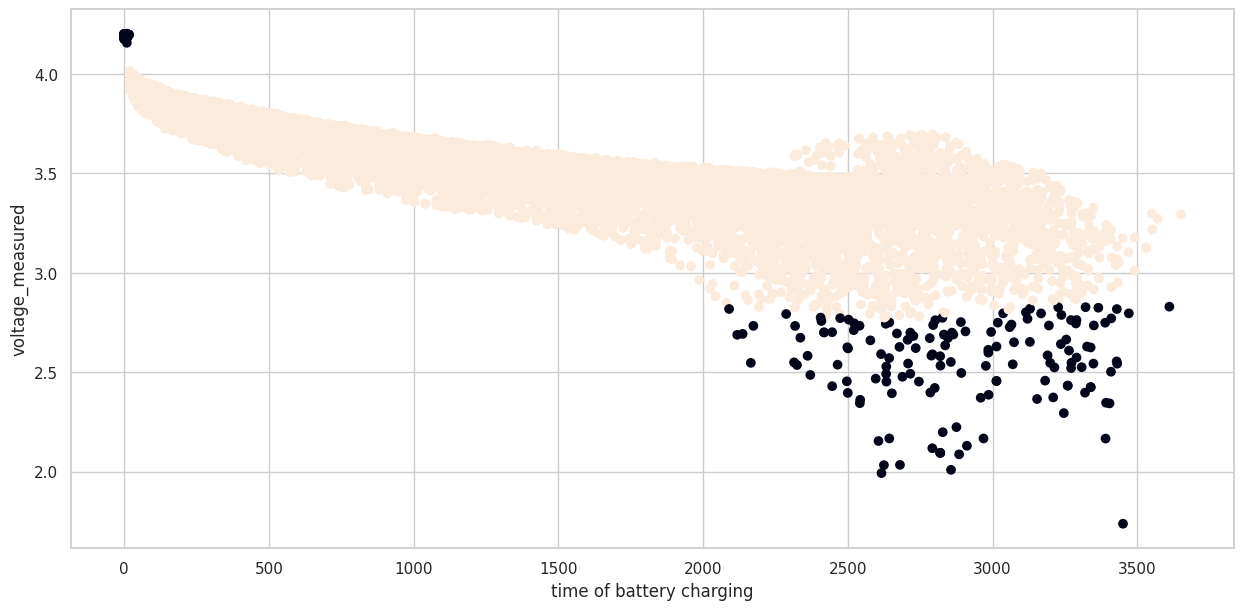

In [ ]:
plt.figure(figsize=(15, 7))
plt.scatter(out_df['time'], out_df['voltage_measured'], c=out_df['label'])
plt.xlabel('time of battery charging')
plt.ylabel('voltage_measured')
plt.show()

- With DBSCAn, we are clearly able to see the cluster for noise points.



In [ ]:
fuel_cells_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185721 entries, 0 to 185720
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   cycle                 185721 non-null  int64  
 1   datetime              185721 non-null  int64  
 2   capacity              185721 non-null  float64
 3   voltage_measured      185721 non-null  float64
 4   current_measured      185721 non-null  float64
 5   temperature_measured  185721 non-null  float64
 6   current_load          185721 non-null  float64
 7   voltage_load          185721 non-null  float64
 8   time                  185721 non-null  float64
 9   flag                  185721 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 15.6 MB


### Minmax Scaling of orginal data:

In [ ]:

cols = ['cycle', 'datetime', 'capacity', 'voltage_measured', 'current_measured',
       'temperature_measured', 'current_load', 'voltage_load', 'time', 'flag']
mm_scaler = MinMaxScaler()

fuel_cells_df[cols] = mm_scaler.fit_transform(fuel_cells_df[cols])
fuel_cells_df.head()

,cycle,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,flag
0,0.00000,0.0,0.797111,0.983242,0.990600,0.099077,0.49985,0.000000,0.000000,0.0
1,0.00002,0.0,0.797111,0.982944,0.992276,0.098875,0.49985,0.989880,0.004547,0.0
2,0.00004,0.0,0.797111,0.896465,0.008109,0.102032,0.00045,0.720640,0.009675,0.0
3,0.00006,0.0,0.797111,0.887189,0.007399,0.109822,0.00045,0.713109,0.014574,0.0
4,0.00008,0.0,0.797111,0.880233,0.008787,0.119162,0.00045,0.708637,0.019490,0.0


<!-- ![image.png](attachment:image.png) -->

- Batteries with much higher capacities and much lower capacities but having minimum temperature measured are having most critical number of outliers
- The batteries with least temperature measured are having more number of outliers.


#  Local Outlier Factor(LOF) based Anomaly detection

In [ ]:
lof_df = fuel_cells_df_copy2.copy()

In [ ]:
fuel_cells_df_copy2

,cycle,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,flag
0,1,1207149941000000000,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1
1,2,1207149941000000000,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1
2,3,1207149941000000000,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1
3,4,1207149941000000000,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1
4,5,1207149941000000000,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1
...,...,...,...,...,...,...,...,...,...,...
185716,34862,1219221439000000000,1.341051,3.443760,-0.002426,35.383979,0.0006,0.000,2686.359,4
185717,34863,1219221439000000000,1.341051,3.453271,-0.000981,35.179732,0.0006,0.000,2700.546,4
185718,34864,1219221439000000000,1.341051,3.461963,0.000209,34.977000,0.0006,0.000,2714.640,4
185719,34865,1219221439000000000,1.341051,3.469907,0.001516,34.785943,0.0006,0.000,2728.750,4


In [ ]:
n_neighbors = [5, 20]
contamination_arr = [0.01,0.04]
flags_arr = [1,2,3,4]

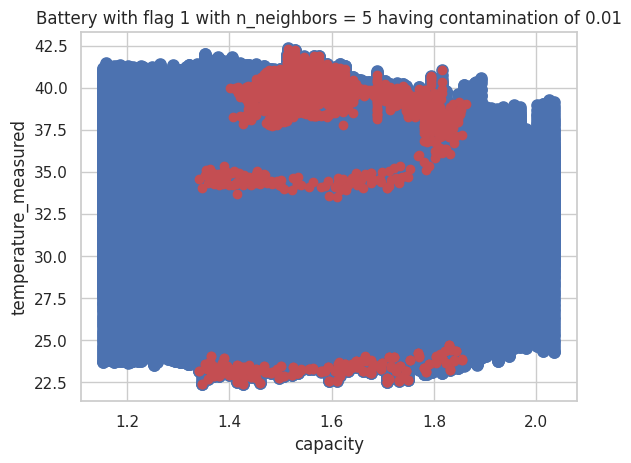

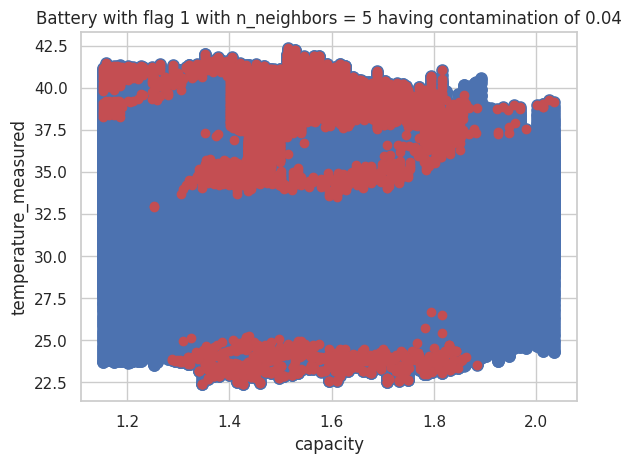

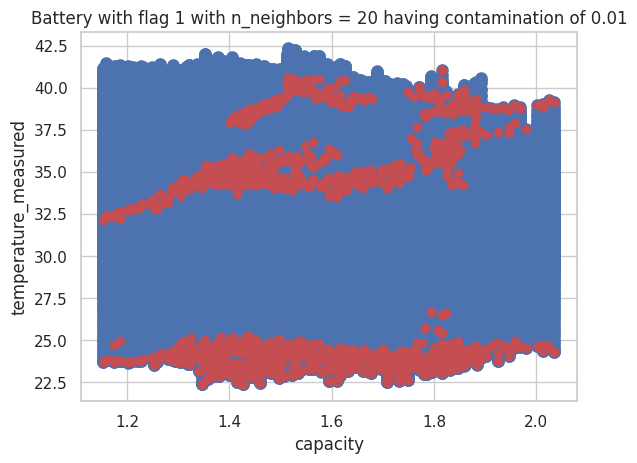

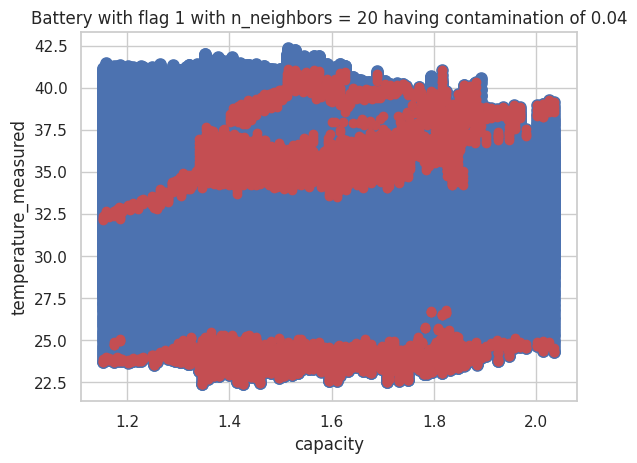

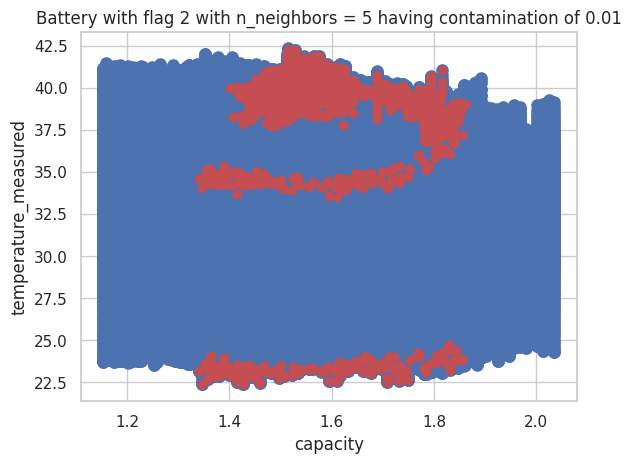

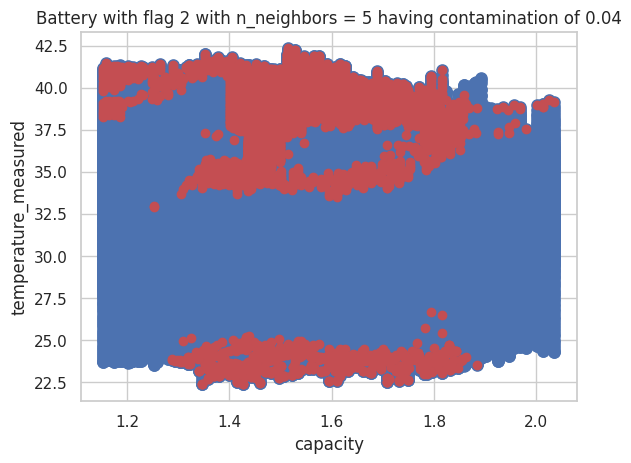

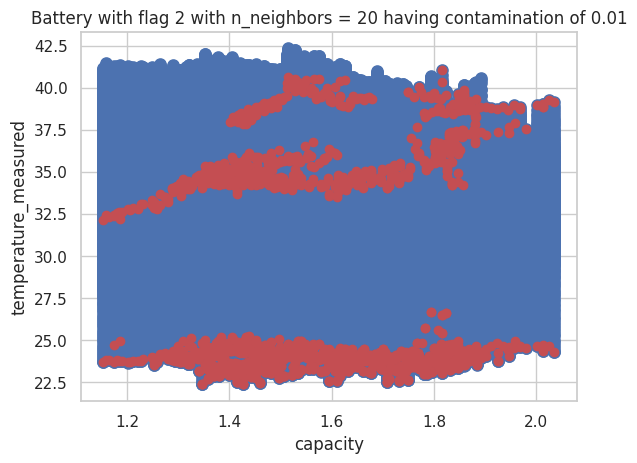

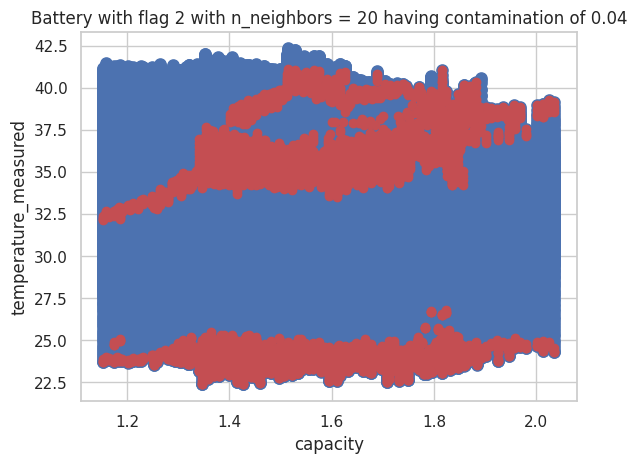

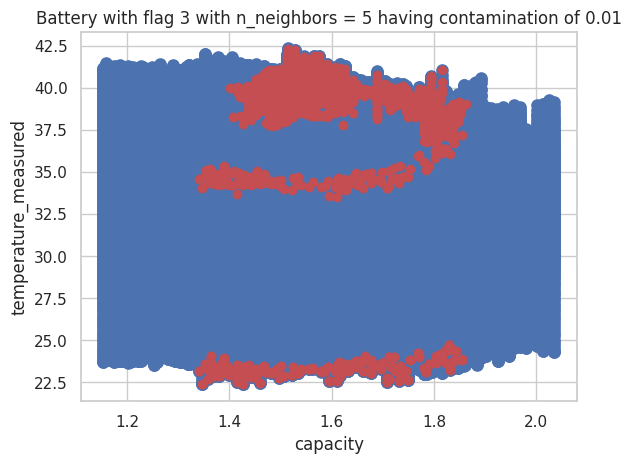

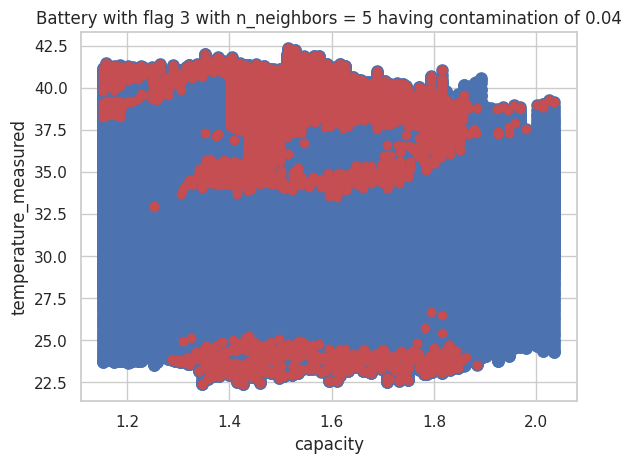

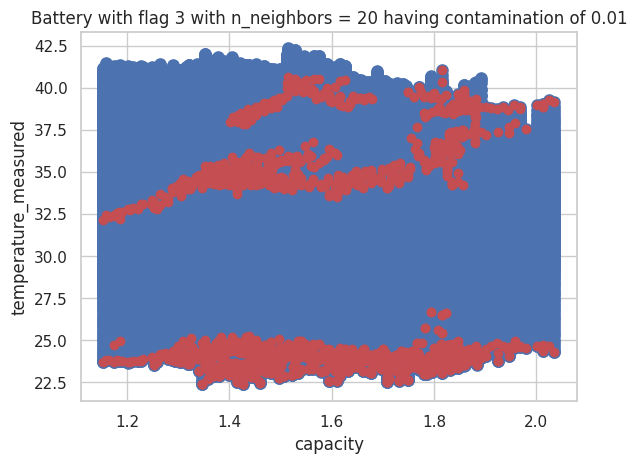

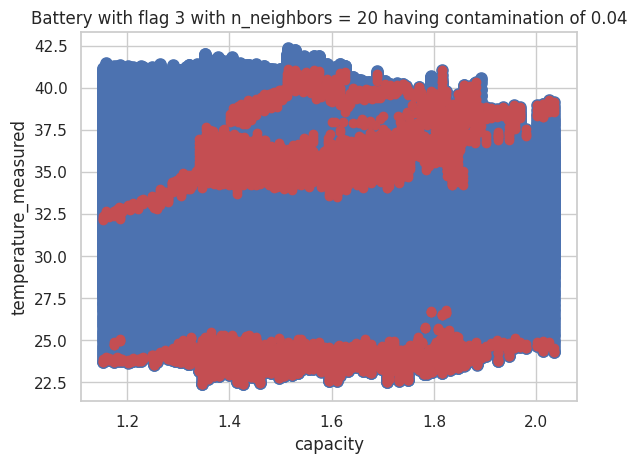

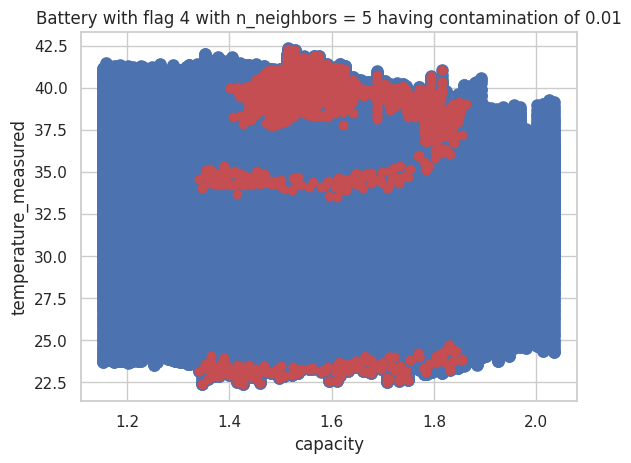

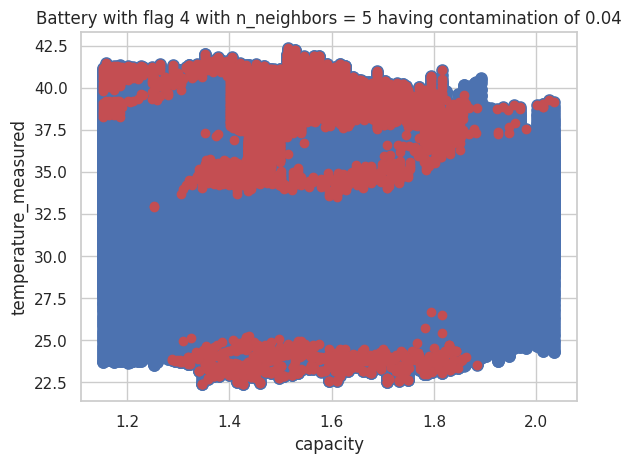

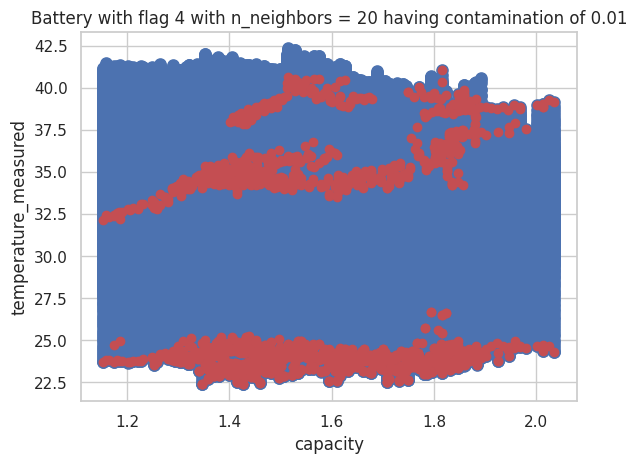

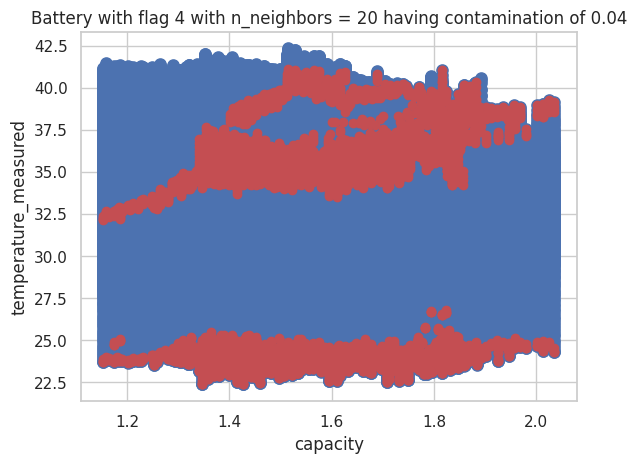

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
for f in flags_arr:
    for n in n_neighbors:
        for c in contamination_arr:
            # model specification
            model1 = LocalOutlierFactor(n_neighbors = n, metric = "manhattan", contamination = c)
            # model fitting
            y_pred = model1.fit_predict(fuel_cells_df_copy2)
            # filter outlier index
            outlier_index = np.where(y_pred == -1) # negative values are outliers and positives inliers
            # filter outlier values
            outlier_values = fuel_cells_df_copy2.iloc[outlier_index]
            # plot data
            plt.scatter(fuel_cells_df_copy2["capacity"], fuel_cells_df_copy2["temperature_measured"], color = "b", s = 65)
            # plot outlier values
            plt.scatter(outlier_values["capacity"], outlier_values["temperature_measured"], color = "r")
            plt.xlabel('capacity')
            plt.ylabel('temperature_measured')
            plt.title('Battery with flag ' + str(f)+ ' with n_neighbors = '+ str(n)+' having contamination of '+str(c))
            plt.show()

- In LOF, the hypermeters used are n_neighbors = [5, 20] and contamination_ = [0.01,0.04].
-  7429 datapoints are  classified as outliers using maximum nearest neigbors (20) and with higesht contamination percentage of 4%.
- considering less nearest neigbors and less contamination percentage, we are getting less no. of outliers specifically in the mid-battery capacity range (1.4-1.6) having least and maximum temperature measured.

In [ ]:
len(y_pred)

185721

In [ ]:
fuel_cells_df_copy2

,cycle,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,flag
0,1,1207149941000000000,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1
1,2,1207149941000000000,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1
2,3,1207149941000000000,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1
3,4,1207149941000000000,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1
4,5,1207149941000000000,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1
...,...,...,...,...,...,...,...,...,...,...
185716,34862,1219221439000000000,1.341051,3.443760,-0.002426,35.383979,0.0006,0.000,2686.359,4
185717,34863,1219221439000000000,1.341051,3.453271,-0.000981,35.179732,0.0006,0.000,2700.546,4
185718,34864,1219221439000000000,1.341051,3.461963,0.000209,34.977000,0.0006,0.000,2714.640,4
185719,34865,1219221439000000000,1.341051,3.469907,0.001516,34.785943,0.0006,0.000,2728.750,4


In [ ]:
y_pred_df = pd.DataFrame(data=y_pred,columns=['y_pred'])
fuel_cells_df_copy2_final_lof = pd.concat([fuel_cells_df_copy2,y_pred_df],axis = 1)
fuel_cells_df_copy2_final_lof

,cycle,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,flag,y_pred
0,1,1207149941000000000,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1,-1
1,2,1207149941000000000,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1,-1
2,3,1207149941000000000,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1,-1
3,4,1207149941000000000,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1,-1
4,5,1207149941000000000,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1,1
...,...,...,...,...,...,...,...,...,...,...,...
185716,34862,1219221439000000000,1.341051,3.443760,-0.002426,35.383979,0.0006,0.000,2686.359,4,-1
185717,34863,1219221439000000000,1.341051,3.453271,-0.000981,35.179732,0.0006,0.000,2700.546,4,-1
185718,34864,1219221439000000000,1.341051,3.461963,0.000209,34.977000,0.0006,0.000,2714.640,4,-1
185719,34865,1219221439000000000,1.341051,3.469907,0.001516,34.785943,0.0006,0.000,2728.750,4,-1


In [ ]:
# No. of outliers when we are considering the highest contamoination i.e 4 %

fuel_cells_df_copy2_final_lof[fuel_cells_df_copy2_final_lof['y_pred'] == -1]

,cycle,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,flag,y_pred
0,1,1207149941000000000,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1,-1
1,2,1207149941000000000,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1,-1
2,3,1207149941000000000,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1,-1
3,4,1207149941000000000,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1,-1
193,194,1207149941000000000,1.856487,3.264121,-0.001532,35.021738,-0.0006,0.000,3628.953,1,-1
...,...,...,...,...,...,...,...,...,...,...,...
185716,34862,1219221439000000000,1.341051,3.443760,-0.002426,35.383979,0.0006,0.000,2686.359,4,-1
185717,34863,1219221439000000000,1.341051,3.453271,-0.000981,35.179732,0.0006,0.000,2700.546,4,-1
185718,34864,1219221439000000000,1.341051,3.461963,0.000209,34.977000,0.0006,0.000,2714.640,4,-1
185719,34865,1219221439000000000,1.341051,3.469907,0.001516,34.785943,0.0006,0.000,2728.750,4,-1


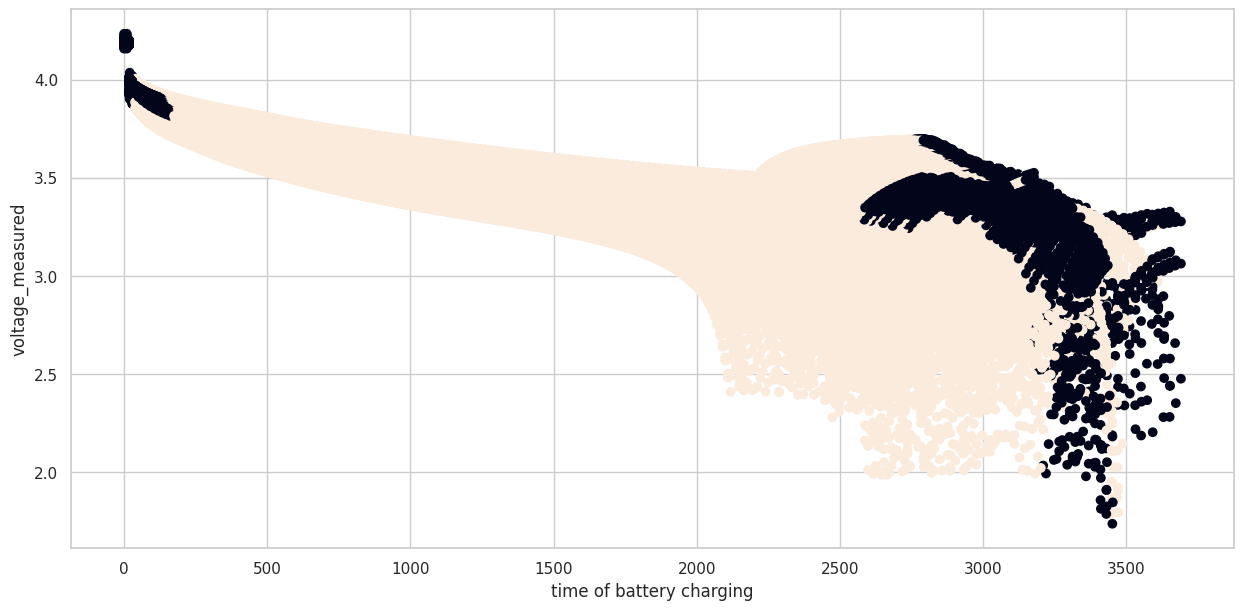

In [ ]:
plt.figure(figsize=(15, 7))
plt.scatter(fuel_cells_df_copy2_final_lof['time'], fuel_cells_df_copy2_final_lof['voltage_measured'], c=fuel_cells_df_copy2_final_lof['y_pred'])
plt.xlabel('time of battery charging')
plt.ylabel('voltage_measured')
plt.show()

#  Elliptical Envelope based Anomaly detection

In [ ]:
eliptical_df = fuel_cells_df_copy2.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
cols = ['cycle', 'datetime', 'capacity', 'voltage_measured', 'current_measured',
       'temperature_measured', 'current_load', 'voltage_load', 'time', 'flag']
scaler = StandardScaler()

eliptical_df[cols] = scaler.fit_transform(eliptical_df[cols])
eliptical_df.head()

,cycle,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,flag
0,-1.678666,-1.424022,1.477315,2.758442,3.255533,-1.998389,-1.194938,-3.149552,-1.705022,-1.281811
1,-1.678595,-1.424022,1.477315,2.755491,3.261632,-1.999392,-1.194938,2.448187,-1.686519,-1.281811
2,-1.678524,-1.424022,1.477315,1.897777,-0.320553,-1.983728,-2.823146,0.925645,-1.665656,-1.281811
3,-1.678453,-1.424022,1.477315,1.805782,-0.323138,-1.945079,-2.823146,0.883056,-1.645723,-1.281811
4,-1.678383,-1.424022,1.477315,1.736792,-0.318086,-1.898742,-2.823146,0.857769,-1.625721,-1.281811


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test= train_test_split(eliptical_df, test_size=0.33, random_state=42)

In [ ]:
# convert tarin dataframe to arrays
data = X_train[cols].values

In [ ]:

from sklearn.covariance import EllipticEnvelope
model1 = EllipticEnvelope(contamination = 0.1)
# fit the model
model1.fit(data)

EllipticEnvelope()

In [ ]:
# convert test dataframe to arrays
# new data for prediction (data needs to be in arrays)
new_data = X_test[cols].values

In [ ]:
pred1 = model1.predict(new_data)
print(pred1)

[1 1 1 ... 1 1 1]


In [ ]:
len(new_data)

61288

In [ ]:
len(pred1)

61288

In [ ]:
pred_df = pd.DataFrame(data=pred1,columns=['pred1'])
fuel_cells_df_copy2_final_eliptical = pd.concat([X_test,pred_df],axis = 1)


In [ ]:
pred_df

,pred1
0,1
1,1
2,1
3,1
4,1
...,...
61283,1
61284,1
61285,1
61286,1


In [ ]:
X_test

,cycle,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,flag
94986,1.488209,0.026246,-1.686115,-0.469938,-0.319177,-0.111202,0.434900,0.140418,-0.536915,-0.349901
182194,0.541568,2.434538,-0.990579,-3.487875,-0.314516,1.460708,0.434574,-0.832466,1.052468,1.513919
96713,1.610559,0.064419,-1.852381,0.757447,-0.314559,-1.444924,0.434737,0.539686,-1.445689,-0.349901
86446,0.883186,-0.156326,-1.028915,-0.553402,-0.320190,0.545350,0.434900,0.111138,-0.092657,-0.349901
134163,0.701254,-0.221676,-0.240105,0.502181,-0.281645,-0.370104,0.435715,0.426560,-0.723166,0.582009
...,...,...,...,...,...,...,...,...,...,...
170230,-0.306030,2.066050,-0.181811,0.419846,-0.314026,-0.877855,0.434737,0.438538,-0.639903,1.513919
68294,-0.402805,-0.553487,-0.040528,-0.462780,-0.316967,0.421779,0.434900,0.144410,0.476073,-0.349901
184683,0.717903,2.536516,-1.081689,-2.332737,-0.315089,1.169705,0.434737,-0.478448,0.957214,1.513919
32289,0.608871,-0.244885,-0.660021,0.863215,-0.322651,-0.574446,0.434248,0.486450,-1.146181,-1.281811


In [ ]:
fuel_cells_df_copy2_final_eliptical[fuel_cells_df_copy2_final_eliptical['pred1'] == -1].shape

(5943, 11)

In [ ]:
# predict on all data
all_data = eliptical_df[cols].values
pred2 = model1.predict(all_data)
print(pred2)

[ 1  1 -1 ... -1 -1 -1]


In [ ]:
len(pred2)

185721

In [ ]:
len(all_data)

185721

In [ ]:
pred_df_all = pd.DataFrame(data=pred2,columns=['pred2'])
final_eliptical = pd.concat([fuel_cells_df_copy2,pred_df_all],axis = 1)
final_eliptical

,cycle,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,flag,pred2
0,1,1207149941000000000,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1,1
1,2,1207149941000000000,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1,1
2,3,1207149941000000000,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1,-1
3,4,1207149941000000000,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1,-1
4,5,1207149941000000000,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1,-1
...,...,...,...,...,...,...,...,...,...,...,...
185716,34862,1219221439000000000,1.341051,3.443760,-0.002426,35.383979,0.0006,0.000,2686.359,4,-1
185717,34863,1219221439000000000,1.341051,3.453271,-0.000981,35.179732,0.0006,0.000,2700.546,4,-1
185718,34864,1219221439000000000,1.341051,3.461963,0.000209,34.977000,0.0006,0.000,2714.640,4,-1
185719,34865,1219221439000000000,1.341051,3.469907,0.001516,34.785943,0.0006,0.000,2728.750,4,-1


In [ ]:
final_eliptical[final_eliptical['pred2'] == -1]

,cycle,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,flag,pred2
2,3,1207149941000000000,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1,-1
3,4,1207149941000000000,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1,-1
4,5,1207149941000000000,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1,-1
5,6,1207149941000000000,1.856487,3.920058,-2.013007,24.909816,-1.9982,2.991,90.094,1,-1
6,7,1207149941000000000,1.856487,3.907904,-2.014400,25.105884,-1.9982,2.977,108.281,1,-1
...,...,...,...,...,...,...,...,...,...,...,...
185716,34862,1219221439000000000,1.341051,3.443760,-0.002426,35.383979,0.0006,0.000,2686.359,4,-1
185717,34863,1219221439000000000,1.341051,3.453271,-0.000981,35.179732,0.0006,0.000,2700.546,4,-1
185718,34864,1219221439000000000,1.341051,3.461963,0.000209,34.977000,0.0006,0.000,2714.640,4,-1
185719,34865,1219221439000000000,1.341051,3.469907,0.001516,34.785943,0.0006,0.000,2728.750,4,-1


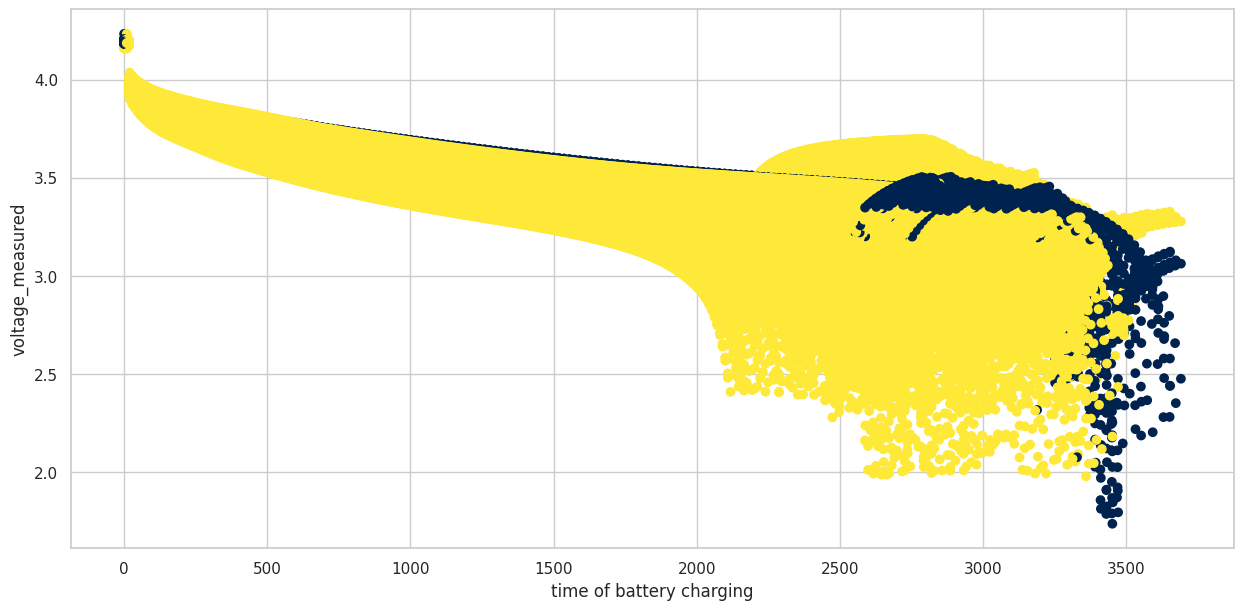

In [ ]:
plt.figure(figsize=(15, 7))
plt.scatter(final_eliptical['time'], final_eliptical['voltage_measured'], c=final_eliptical['pred2'],cmap='cividis' )
plt.xlabel('time of battery charging')
plt.ylabel('voltage_measured')
plt.show()

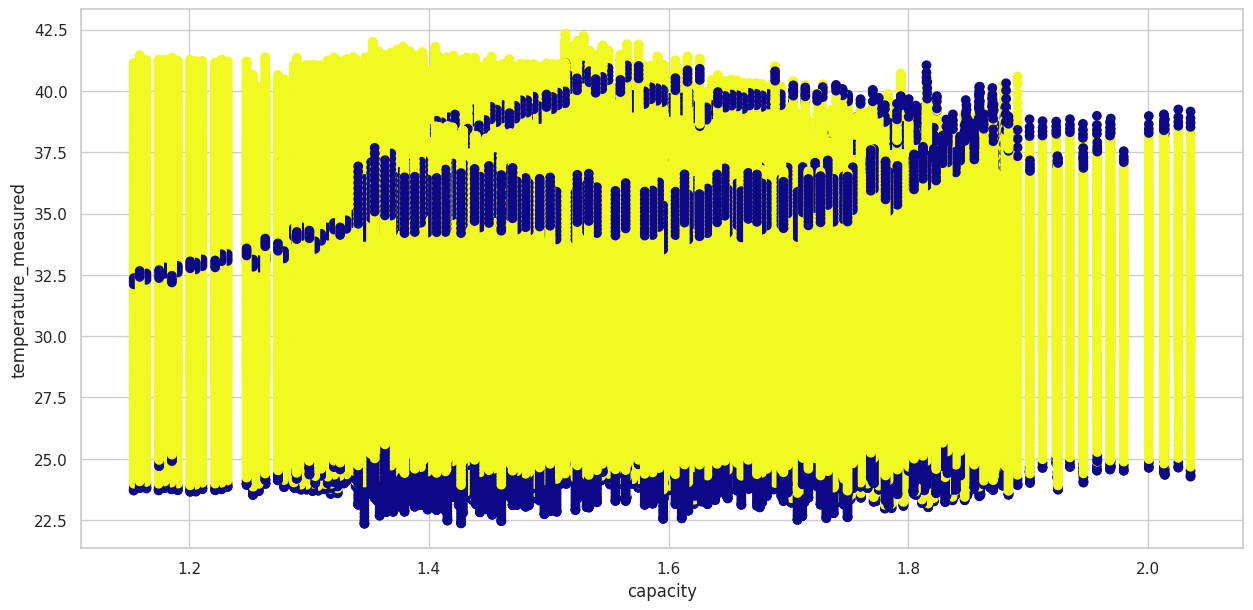

In [ ]:
plt.figure(figsize=(15, 7))
plt.scatter(fuel_cells_df_copy2_final_lof['capacity'], fuel_cells_df_copy2_final_lof['temperature_measured'], c=fuel_cells_df_copy2_final_lof['y_pred'],cmap='plasma')
plt.xlabel('capacity')
plt.ylabel('temperature_measured')
plt.show()

# Comparison of results from the above algorithms:

#### I have tried these methods for anamoly detection:
-  IQR based
-  DBSCAN (density based)
-  Local Outlier Factor (LOF)
-  Elliptical Envelope


###  IQR based
- From IQR based Detection, total 37,766 datapoints (20.13% data) are tagged as outliers .
- The number of data points being classified are huge and might contain some useful information as well, so we should try other methods of anomaly detection.

###  DBSCAN (density based)
- With  the  hyperparameters (eps and minpts  eps = 0.5, min_samples = 200), There were 8009  outliers.

###  Local Outlier Factor (LOF)
- In Local Outlier Factor (LOF), the hypermeters used are n_neighbors = [5, 20] and contamination_ = [0.01,0.04].
- Almost 7429 datapoints were classified as outliers using maximum nearest neigbors (20) and with higesht contamination percentage of 4%
- With least nearest neigbors and least contamination percentage, we are getting less no. of outliers specifically in the mid-battery capacity range (1.4-1.6) having least and maximum temperature measured.

###  Elliptical Envelope
- After considering contamination  hyperparametr, we are able to get 18387 data points labelled (-1) i.e outliers.
- But this method is better than that of IQR Baesd Anomaly Detection.

### Final performance conclusions:
#### 1. Local Outlier Factor (LOF)
 ### 2. DBSCAN (density based)
 ### 3. Elliptical Envelope
 ### 4. IQR based



#**Observations and Recommendations:**

The capacity of batteries decreases as the number of usage cycles increases. Additionally, capacity deteriorates over time.

When new, Battery B0006 (2nd one) has the largest capacity. Batteries B0018 and B0007 have the least capacity when unused.

Over time, Battery B0006 shows a more significant deteriorating trend than others. Battery B0007 exhibits the most efficient capacity. Battery B0006 (with flag 2) has the maximum number of outliers, likely impacting its performance.

Testing of battery charging cycles hasn't been continuous. The first three batteries were tested synchronously, while Battery B0018 was tested post July 2008 with breaks.

The general trend indicates a decrease in the time of battery cycle charging over time.

Battery B0018, launched recently, has an average capacity over time.

Battery B0002's capacity deteriorates the most over time, while Battery B0007 maintains efficient capacity over time.

Across all four batteries, an increase in charging time corresponds to an increase in capacity.

The depreciation of batteries increases with time, potentially due to an increase in measured temperature during each charging cycle.

Batteries with significantly higher or lower capacities and minimum measured temperatures have the most critical number of outliers.

Batteries with the least measured temperature have a higher number of outliers on average.

Outliers/anomalies can be identified based on extreme voltage readings and minimum charging time or maximum charging time with least contamination.

Increasing the contamination threshold percentage to 4% helps classify visually apparent anomalies as outliers compared to a contamination level of 1%.

Under high contamination (4%), batteries requiring maximum charging time and having low voltages are clear outliers.

With an increasing contamination percentage, more data points are classified as extreme outliers.

Lowering the number of nearest neighbors and contamination percentage reduces the number of outliers, especially for batteries with mid-range capacities and minimum/maximum measured temperatures.
